## **Análise de série de vazões (Xingó)**

### 1 - Leitura dos dados e gerando hidrogramas

In [3]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go

import sys
sys.path.insert(0, r'C:\Users\arist\OneDrive\Documentos\UFAL\Pesquisas\PIBIC 24-25\lib_clebson\HydroComp')

from files.ons import Ons
from files.ana import Ana
from series.flow import Flow
from series.chuva import Chuva
from series.circular import Circular

In [4]:
file = "ONS_daily_flow.csv"
dados = pd.read_csv(file, index_col=0, parse_dates=True)
dados = pd.DataFrame(dados["XINGO (178)"])

#Filtrando período de análise ()
#dados = dados[(dados.index >= "1994-09-01") & (dados.index <= "2018-08-31")]
dados = dados[dados.index <= "1994-09-01"]

#Convetendo obj pandas para Series Flow
dados = Flow(pd.DataFrame(dados["XINGO (178)"]))

#Gerando hidrograma
fig, data = dados.plot_hydrogram()
#py.offline.plot(fig, filename='gráficos/hidrograma.html')
pio.show(fig)

#Calculando picos anuais
peaks_max = dados.maximum(station="XINGO (178)")

#Gerando hidrograma destanco os valores de pico
fig, data = peaks_max.plot_hydrogram()
#py.offline.plot(fig, filename='gráficos/histo_max.html')
pio.show(fig)


### **2 - Séries de durações parciais**

#### 2.1 - Separando eventos hidrológicos e calculando métricas

In [5]:
station = "XINGO (178)"

#'stationary' or 'events_by_year'
type_threshold = 'stationary' 

#'flood' or 'drought'
type_event = 'flood'

#'media', 'mediana' or 'autocorrelation' 
type_criterion = 'autocorrelation'

#Peaks or percentil
value_threshold = 0.75

peaks_sdp = dados.parcial(station, type_threshold, type_event, type_criterion, value_threshold)
peaks_sdp.peaks.head()

,Duration,Start,End,peaks
1931-01-11,23,1931-01-01,1931-01-24,5753.0
1931-05-06,93,1931-02-15,1931-05-19,7527.0
1932-02-09,31,1932-01-20,1932-02-20,5493.0
1932-12-29,20,1932-12-22,1933-01-11,4912.0
1933-02-20,45,1933-01-14,1933-02-28,6476.0


In [6]:
#Armazenando dataframe da SDP calculada
df_sdp = peaks_sdp.peaks

In [12]:
fig, data = peaks_sdp.plot_hydrogram(title='SDP-Xingo')
py.offline.plot(fig, filename='gráficos/histo_sdp_by_year.html')

'gráficos/histo_sdp_by_year.html'

##### Estimando parâmetros de distribuição para magnitude e duração

In [20]:
#Máxima verosimilhança
print('------------- MVS ------------- ')
for variable in ['peaks', 'Duration']:
    print('\n', variable)
    for distribuition in ['Gev', 'GP', 'P3']:
        print(f'{distribuition}: {peaks_sdp.mvs(distribuition, variable)}')
print('------------------------------- \n')

#Momentos-L
print('------------- MML ------------- ')
for variable in ['peaks', 'Duration']:
    print('\n', variable)
    for distribuition in ['Gev', 'GP', 'P3']:
        print(f'{distribuition}: {peaks_sdp.mml(distribuition, variable)}')
print('------------------------------- ')




------------- MVS ------------- 

 peaks
Gev: (-5.844498959275384, 4101.105390449215, 0.6159611455855583)
GP: (0.36211713124045763, 4100.999976398484, 1793.4012964802141)
P3: (2.154609634444773, 6249.7728451297335, 2314.883337174915)

 Duration
Gev: (-0.663913102347098, 17.354144904290827, 16.85257585692284)
GP: (0.0584610728763513, 1.9999999999749558, 37.652116765917064)
P3: (2.142890204915987, 37.57183352913472, 38.11326682024244)
------------------------------- 

------------- MML ------------- 

 peaks
Gev: [-0.3552530157619452, 5164.303391482532, 1134.8012423287266]
GP: [0.18243569969934662, 4164.454674096754, 1848.653574731456]
P3: [2.5348375091922297, 6425.62676056338, 2657.15729622881]

 Duration
Gev: [-0.2723687380355593, 20.96016747146518, 22.30905540892346]
GP: [0.053207293219863595, 0.33029731235013315, 39.41256527272495]
P3: [2.145779959553439, 41.95774647887324, 43.49756999747296]
------------------------------- 


### **3 - Modelagem das distribuições marginais**

#### 3.1 - Magnitude (Generalizada de Pareto)

##### Máxima Verossimilhança

In [7]:
#Distribuição cumulativa
title = 'Xingó'
type_function = 'cumulative'
fig_acum_mvs_pareto, data_acum_mvs_pareto = peaks_sdp.plot_distribution(title, type_function, estimador='mvs', distribuition='GP', variable='peaks')
#py.offline.plot(fig, filename='gráficos/distrib_cum_sdp_mvs.html')
#pio.show(fig_acum_mvs_pareto)

#Distribuição densidade-probabilidade
title = 'Xingó'
type_function = 'density'
fig_density_mvs_pareto, data_density_mvs_pareto = peaks_sdp.plot_distribution(title, type_function, estimador='mvs', distribuition='GP', variable='peaks')
#py.offline.plot(fig, filename='gráficos/distrib_density_sdp_mvs.html')
#pio.show(fig_density_mvs_pareto)

##### Momemtos L

In [8]:
#Distribuição cumulativa
title = 'Xingó'
type_function = 'cumulative'
fig_acum_mml_pareto, data_acum_mml_pareto = peaks_sdp.plot_distribution(title, type_function, estimador='mml', distribuition='GP', variable='peaks')
#py.offline.plot(fig, filename='gráficos/distrib_cum_sdp_mvs.html')
pio.show(fig_acum_mml_pareto)

#Distribuição densidade-probabilidade
title = 'Xingó'
type_function = 'density'
fig_density_mml_pareto, data_density_mmml_pareto = peaks_sdp.plot_distribution(title, type_function, estimador='mml', distribuition='GP', variable='peaks')
#py.offline.plot(fig, filename='gráficos/distrib_density_sdp_mvs.html')
pio.show(fig_density_mml_pareto)

##### Verificando parâmetros

In [9]:
#Parâmetros 
print("MML: ", peaks_sdp.mml('GP', 'peaks'))

print("MVS", peaks_sdp.mvs('GP', 'peaks'))

MML:  [0.18243569969934662, 4164.454674096754, 1848.653574731456]
MVS (0.36211713124045763, 4100.999976398484, 1793.4012964802141)


##### Visualizando distribuições pelos dois estimadores

In [10]:
#Definindo legenda
fig_density_mml_pareto['data'][0].name = "MML"
fig_density_mvs_pareto['data'][0].name = "MVS"

#Ajustando cor dos gráficos
fig_density_mml_pareto['data'][0].line.color = 'rgb(0, 0, 0)'

#Densidade
fig_density = go.Figure(data = fig_density_mvs_pareto['data'] + fig_density_mml_pareto['data'])

fig_density.update_layout(
    title="GP - Densidade Xingó",
    xaxis_title="Vazão (m³/s)",
    showlegend=True,
    font=dict(family='Time New Roman', size=20, color='rgb(0,0,0)')) 

fig_density.show()


#Acumulado

#Definindo legenda
fig_acum_mml_pareto['data'][0].name = "MML"
fig_acum_mvs_pareto['data'][0].name = "MVS"

#Ajustando cor dos gráficos
fig_acum_mml_pareto['data'][0].line.color = 'rgb(0, 0, 0)'

fig_acum = go.Figure(data = fig_acum_mvs_pareto['data'] + fig_acum_mml_pareto['data'])

fig_acum.update_layout(
    title="GP - Acumulado Xingó",
    xaxis_title="Vazão (m³/s)",
    showlegend=True,
    font=dict(family='Time New Roman', size=20, color='rgb(0,0,0)')) 

fig_acum.show()

#### 3.2 - Duração ( Pearson III) 

In [11]:
#Distribuição densidade-probabilidade
title = 'Xingó'
type_function = 'density'
fig_density_mml_pearson, data_density_mmml_pareto = peaks_sdp.plot_distribution(title, type_function, estimador='mml', distribuition='P3', variable='Duration')
#py.offline.plot(fig, filename='gráficos/distrib_density_sdp_mvs.html')
pio.show(fig_density_mml_pearson)

#Distribuição densidade-probabilidade
title = 'Xingó'
type_function = 'cumulative'
fig_density_mml_pearson, data_density_mmml_pareto = peaks_sdp.plot_distribution(title, type_function, estimador='mml', distribuition='P3', variable='Duration')
#py.offline.plot(fig, filename='gráficos/distrib_density_sdp_mvs.html')
pio.show(fig_density_mml_pearson)


In [12]:
#Parâmetros 
print("MML: ", peaks_sdp.mml('P3', 'Duration'))

print("MVS", peaks_sdp.mvs('P3', 'Duration'))

MML:  [2.145779959553439, 41.95774647887324, 43.49756999747296]
MVS (2.142890204915987, 37.57183352913472, 38.11326682024244)


#### 3.3 - Período de ocorrência (Von-Mises)

In [13]:
#Criando objetivo para manipular os dados de período de ocorrência de cheias 
period = Circular(df_sdp)


In [14]:
#Visualizando gráfico de barras circular
period.plot_bar_circular(month_num_start_year_hydrologic=9, unit='degrees')

In [15]:
period.plot_scatter_circular(month_num_start_year_hydrologic=9, unit='degrees')

##### Estimação parâmetros Von-Mises

In [18]:
import numpy as np
from scipy.stats import circmean
from scipy.optimize import root_scalar
from scipy.special import i0, i1  # Funções de Bessel para cálculo de kappa

def vonmises_params_lmoments(data):
    """
    Estima os parâmetros de forma, posição e escala de uma distribuição Von Mises
    utilizando o método dos momentos-L adaptado para dados circulares.

    Parâmetros:
    - data: array-like, dados circulares (em graus ou radianos).
    - input_unit: string, unidade dos dados de entrada ("radian" ou "degree").

    Retorno:
    - mu: parâmetro de posição (média circular) em radianos.
    - kappa: parâmetro de forma (concentração).
    - scale_proxy: proxy para a escala (inversamente proporcional à dispersão).
    """
    #Parâmetro de posição (média circular)
    mu = circmean(data)

    # Calcular os momentos-L adaptados para dados circulares
    n = len(data)
    weights = np.arange(1, n + 1)
    sorted_data = np.sort(data)

    b0 = np.mean(np.exp(1j * sorted_data))
    b1 = np.mean(weights[:, None] * np.exp(1j * sorted_data)) / np.sum(weights)
    b2 = np.mean(weights[:, None] * (np.exp(1j * sorted_data) ** 2)) / np.sum(weights)

    l1 = np.angle(b0)  # Primeiro momento-L (posição, adaptado para circularidade)
    l2 = np.abs(2*b1 - b0)  # Segundo momento-L (escala, adaptado para circularidade)

    # Razão do segundo momento-L
    tau = l2 / l1 if l1 != 0 else 0

    # Estimar o parâmetro de concentração (kappa) com base na razão
    def kappa_eq(kappa):
        return i1(kappa) / i0(kappa) - tau

    if tau < 1e-6:  # Caso de dados uniformemente distribuídos
        kappa = 0
    else:
        result = root_scalar(kappa_eq, bracket=[0, 100], method='bisect')
        kappa = result.root if result.converged else np.nan

    # Calcular um proxy para a escala (1/kappa)
    scale_proxy = 1 / kappa if kappa > 0 else np.inf

    return mu, kappa, scale_proxy



In [19]:
# Exemplo de uso
if __name__ == "__main__":
    # Dados simulados de exemplo (em graus)
    data_degrees = period.circular_date(9, 'rad') # Dados em graus

    # Estimar os parâmetros
    mu, kappa, scale_proxy = vonmises_params_lmoments(data_degrees)

    # Exibir os resultados
    print(f"Parâmetro de posição (mu): {mu:.4f} radianos")
    print(f"Parâmetro de forma (kappa): {kappa:.4f}")
    print(f"Proxy para escala (1/kappa): {scale_proxy:.4f}")



Parâmetro de posição (mu): 2.9749 radianos
Parâmetro de forma (kappa): 0.5174
Proxy para escala (1/kappa): 1.9328


In [33]:
from scipy.stats import vonmises_line

circular_dates = period.circular_date(9, 'rad')

vonmises_line.fit(circular_dates)

(0.5950952083912722, 2.9761329718030742, 0.4992453495423932)

### **4 - Modelagem função cópula Gaussiana (abordagem frequencista)**

#### Test 1

In [22]:
#Calculando parâmetros (forma, posição e escala)
peaks_GP_params = peaks_sdp.mml('GP', 'peaks')
duration_P3_params = peaks_sdp.mml('P3', 'Duration')

data_degrees = period.circular_date(9, 'degrees')
#period_vonmises_params = vonmises_params_lmoments(data_degrees, input_unit="degree")

print('Peaks - GP ', peaks_GP_params)
print('Duration - P3 ', duration_P3_params)
#print('Period - VM ', period_vonmises_params)

Peaks - GP  [0.18243569969934662, 4164.454674096754, 1848.653574731456]
Duration - P3  [2.145779959553439, 41.95774647887324, 43.49756999747296]


In [14]:
def degrees_to_radians(deg):
    return deg * np.pi / 180

def radians_to_degrees(rad):
    return rad * 180 / np.pi

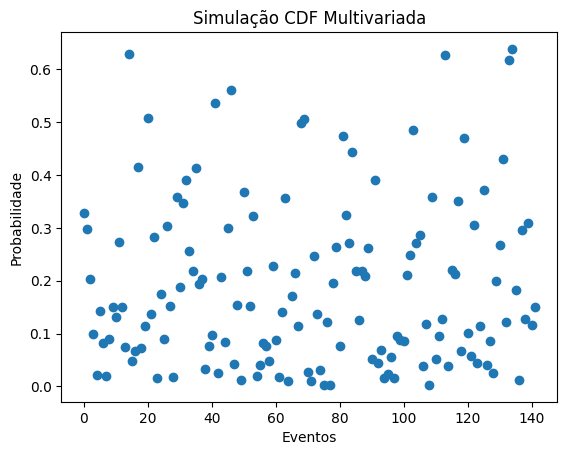

In [29]:
from scipy.stats import genpareto, pearson3, vonmises, norm, multivariate_normal
import matplotlib.pyplot as plt

np.random.seed(30)  # Para reprodutibilidade

n_size = 142

#Gerando amostras aleatórias para cada variável em função da sua respectiva distribuição de probabilidade
X1_peaks = genpareto.rvs(peaks_GP_params[0], peaks_GP_params[1], peaks_GP_params[2], size=n_size)
X2_duration = pearson3.rvs(duration_P3_params[0], duration_P3_params[1], duration_P3_params[2], size=n_size)
X3_period = vonmises.rvs(0.56, 2.9787, 0.4988, size=n_size) #parâmetros obtidos pela dissertação do Clebson
X3_period = np.mod(X3_period, 2 * np.pi) #ajustando para intervalo entre 0 e 2pi


#Transformando distribuição marginais para uniformes (por meio da CDF)
U1_peaks = genpareto.cdf(X1_peaks, peaks_GP_params[0], peaks_GP_params[1], peaks_GP_params[2])
U2_duration = pearson3.cdf(X2_duration, duration_P3_params[0], duration_P3_params[1], duration_P3_params[2])
U3_period = vonmises.cdf(X3_period, 0.56, 2.9787, 0.4988)

#Gerando matriz de correlação (valores obtidos da dissertação do Clebson)

#correlation_matrix = np.array([
    #[1.0, 0.787, 0.164],
    #[0.787, 1.0, 0.117],
    #[0.164, 0.117, 1.0]
#])

correlation_matrix = np.array([
    [1.0, 0.941, 0.232],
    [0.941, 1.0, 0.155],
    [0.232, 0.155, 1.0]
])

#Inversa da CDF da normal padrão
z1 = norm.ppf(U1_peaks)
z2 = norm.ppf(U2_duration)
z3 = norm.ppf(U3_period)

mvn = multivariate_normal(mean=[0, 0, 0], cov=correlation_matrix)

#Gerando trios ordenados

Z = [[z1[i], z2[i], z3[i]] for i in range(n_size)]
values_cdf = [mvn.cdf(z) for z in Z]

plt.scatter(x=range(n_size), y=values_cdf)
plt.title('Simulação CDF Multivariada')
plt.ylabel('Probabilidade')
plt.xlabel('Eventos')
plt.show()

In [156]:
mvn.pdf([0.5, 0.7, 0.9])

0.08741809125241048

### Tempo de retorno multivariado

In [ ]:
df_sdp['circular_period'] = period.circular_date(9, 'rad')

#Selecionando amostras
X1 = df_sdp.peaks.to_list()
X2 = df_sdp.Duration.to_list()
X3 = df_sdp.circular_period.to_list()

#Transformando distribuição marginais para uniformes (por meio da CDF)
u1 = genpareto.cdf(X1 , peaks_GP_params[0], peaks_GP_params[1], peaks_GP_params[2])
u2 = pearson3.cdf(X2 , duration_P3_params[0], duration_P3_params[1], duration_P3_params[2])
u3 = vonmises.cdf(X3, 0.56, 2.9787, 0.4988)

'''#Transformando para o espaço normal padronizado
z_1 = norm.ppf(u1)
z_2 = norm.ppf(u2)
z_3 = norm.ppf(u3)

#Gerando os trios ordenados das observações no espaço normal padrão
Z_flood = [[z_1[i], z_2[i], z_3[i]] for i in range(n_size)]

#Definindo matrix de correlação
correlation_matrix = np.array([
    [1.0, 0.941, 0.232],
    [0.941, 1.0, 0.155],
    [0.232, 0.155, 1.0]
])

#Gerando função normal multivariada
norm_multi = multivariate_normal(mean=[0, 0, 0], cov=correlation_matrix)

#Calculando a probabilidade conjunta para cada valor observado
cdf_flood = [norm_multi.cdf(z) for z in Z_flood]

df_resul = df_sdp[['peaks', 'Duration', 'circular_period']].copy()

df_resul['cdf_flood'] = cdf_flood
df_resul['T'] = 2.2 / (1 - np.array(cdf_flood))
ord_peaks = df_resul.sort_values(by=['peaks', 'Duration'])'''
ord_peaks

,peaks,Duration,circular_period,cdf_flood,T
1964-11-27,4101.0,3,1.497636,0.000000,2.200000
1973-02-08,4103.0,5,2.754273,0.000000,2.200000
1959-01-24,4124.0,7,2.496060,0.000000,2.200000
1950-03-13,4146.0,6,3.322342,0.000000,2.200000
1976-11-29,4149.0,2,1.532064,0.000000,2.200000
...,...,...,...,...,...
1989-12-27,13902.0,57,2.014062,0.095758,2.432977
1960-03-31,15779.0,93,3.639441,0.716339,7.755737
1949-03-18,15785.0,150,3.408413,0.689319,7.081219
1992-03-03,17591.0,91,3.158760,0.534743,4.728570


In [38]:
len(ord_peaks)/63

2.253968253968254

In [41]:
ord_peaks['T']

27.700674271888925

In [25]:
df_sdp.ci

,Duration,Start,End,peaks
1931-01-11,23,1931-01-01,1931-01-24,5753.0
1931-05-06,93,1931-02-15,1931-05-19,7527.0
1932-02-09,31,1932-01-20,1932-02-20,5493.0
1932-12-29,20,1932-12-22,1933-01-11,4912.0
1933-02-20,45,1933-01-14,1933-02-28,6476.0
...,...,...,...,...
1992-05-04,4,1992-05-01,1992-05-05,5003.0
1993-01-19,93,1992-11-15,1993-02-16,6977.0
1993-03-04,33,1993-02-17,1993-03-22,5745.0
1994-02-11,47,1994-01-04,1994-02-20,6564.0


In [ ]:
#Visualizando
plt.scatter(x=range(n_size), y=cdf_flood)
plt.scatter(x=range(n_size), y=values_cdf)

plt.title('Eventos CDF multivariada')
plt.ylabel('Probabilidade')
plt.xlabel('Eventos')
plt.legend(['Cheia Observada', 'Cheia Simulada'], loc='upper right')
plt.show()

#### Entre 1994 e 2018

In [45]:
pip install copulae

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from copulae import GaussianCopula

In [80]:
#===================== LENDO DADOS ===========================

file = "ONS_daily_flow.csv"
dados2 = pd.read_csv(file, index_col=0, parse_dates=True)
dados2 = pd.DataFrame(dados2["XINGO (178)"])

dados2 = dados2[(dados2.index >= "1994-09-01") & (dados2.index <= "2018-08-31")]

#Convetendo obj pandas para Series Flow
dados2 = Flow(pd.DataFrame(dados2["XINGO (178)"]))

#===================== SDPs ===========================
station = "XINGO (178)"

#'stationary' or 'events_by_year'
type_threshold = 'stationary' 

#'flood' or 'drought'
type_event = 'flood'

#'media', 'mediana' or 'autocorrelation' 
type_criterion = 'autocorrelation'

#Peaks or percentil
value_threshold = 0.75

sdp = dados2.parcial(station, type_threshold, type_event, type_criterion, value_threshold)
sdp_events = sdp.peaks

#===================== ESTATÍSTICA DIRECIONAL ===========================
#Criando objetivo para manipular os dados de período de ocorrência de cheias 
period_sdp2 = Circular(sdp_events)

#Calculando datas circuales
sdp_events['circular_period'] = period_sdp2.circular_date(9, 'rad')


##### Calibração (entre 1931 e 1994)

In [78]:
df_sdp['circular_period'] = period.circular_date(9, 'rad')

#Selecionando amostras
X1 = df_sdp.peaks.to_list()
X2 = df_sdp.Duration.to_list()
X3 = df_sdp.circular_period.to_list()

#Transformando distribuição marginais para uniformes (por meio da CDF)
u1 = genpareto.cdf(X1 , peaks_GP_params[0], peaks_GP_params[1], peaks_GP_params[2])
u2 = pearson3.cdf(X2 , duration_P3_params[0], duration_P3_params[1], duration_P3_params[2])
u3 = vonmises.cdf(X3, 0.56, 2.9787, 0.4988)

#Guardando valores para calibração
calibration = pd.DataFrame()
calibration['peaks'], calibration['duration'], calibration['period'] = u1, u2, u3

#Extraindo parâmetros cópula
copule_gaussian = GaussianCopula(dim=3)
copule_gaussian.fit(calibration)

            peaks    duration      period
count  142.000000  142.000000  142.000000
mean     0.500000    0.500000    0.500000
std      0.287656    0.287601    0.287649
min      0.020979    0.013986    0.006993
25%      0.258741    0.255245    0.250874
50%      0.500000    0.503497    0.500000
75%      0.746503    0.743881    0.748252
max      0.993007    0.993007    0.993007


In [79]:
#Visualizando
copule_gaussian.params

array([0.87956717, 0.30499897, 0.18838422])

##### Estimando recorrência (1995 - 2018)

In [82]:
#Selecionando amostras
X1 = sdp_events.peaks.to_list()
X2 = sdp_events.Duration.to_list()
X3 = sdp_events.circular_period.to_list()

#Transformando distribuição marginais para uniformes (por meio da CDF)
u1_validation = genpareto.cdf(X1 , peaks_GP_params[0], peaks_GP_params[1], peaks_GP_params[2])
u2_validation = pearson3.cdf(X2 , duration_P3_params[0], duration_P3_params[1], duration_P3_params[2])
u3_validation = vonmises_line.cdf(X3, 0.56, 2.9787, 0.4988)

#Guardando valores para validação
validation = pd.DataFrame()
validation['peaks'], validation['duration'], validation['period'] = u1_validation, u2_validation, u3_validation

In [85]:
copule_gaussian.cdf(validation)

array([0.        , 0.28892575, 0.        , 0.        , 0.14106847,
       0.        , 0.23524392, 0.49497897, 0.0928118 , 0.17955881,
       0.        , 0.        , 0.40372231, 0.40874211, 0.        ,
       0.06884326, 0.        , 0.19763459, 0.        , 0.21331659,
       0.        , 0.30652551, 0.58421786, 0.07457517, 0.09238896,
       0.        , 0.48900206, 0.        , 0.6391243 , 0.        ,
       0.70370447, 0.20799204, 0.        , 0.08287883, 0.        ,
       0.        , 0.19857617, 0.50070348, 0.18697155, 0.        ,
       0.        , 0.07612988, 0.        , 0.09830725, 0.        ,
       0.        , 0.        , 0.        , 0.26215199, 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:


#Transformando para o espaço normal padronizado
z_1 = norm.ppf(u1)
z_2 = norm.ppf(u2)
z_3 = norm.ppf(u3)

#Gerando os trios ordenados das observações no espaço normal padrão
Z_flood = [[z_1[i], z_2[i], z_3[i]] for i in range(53)]

#Definindo matrix de correlação
correlation_matrix = np.array([
    [1.0, 0.941, 0.232],
    [0.941, 1.0, 0.155],
    [0.232, 0.155, 1.0]
])

#Gerando função normal multivariada
norm_multi = multivariate_normal(mean=[0, 0, 0], cov=correlation_matrix)

#Calculando a probabilidade conjunta para cada valor observado
cdf_flood = [norm_multi.cdf(z) for z in Z_flood]

df_resul = sdp_events[['peaks', 'Duration', 'circular_period']].copy()

df_resul['cdf_flood'] = cdf_flood
df_resul['T'] = 2.2 / (1 - np.array(cdf_flood))
ord_peaks = df_resul.sort_values(by=['peaks', 'Duration'])
ord_peaks

,peaks,Duration,circular_period,cdf_flood,T
2006-02-28,2647.00,4,3.098557,0.000000,2.200000
1998-11-19,2661.00,2,1.359922,0.000000,2.200000
2014-12-20,2735.00,7,1.893563,0.000000,2.200000
2015-02-26,2738.73,4,3.064129,0.000000,2.200000
2001-12-10,2770.00,5,1.721421,0.000000,2.200000
2008-01-06,2807.00,5,2.180231,0.000000,2.200000
2014-04-12,2840.00,3,3.838768,0.000000,2.200000
2015-04-06,2919.67,10,3.735483,0.000000,2.200000
2012-04-04,2999.00,9,3.708109,0.000000,2.200000
1996-03-29,3024.00,8,3.605106,0.000000,2.200000


# Testes

In [49]:
import numpy as np
from scipy.stats import genpareto, pearson3, vonmises, norm

# Definir as distribuições marginais (Generalizada de Pareto, Pearson III, Von Mises)
def marginal_gpd(x, c, loc, scale):
    return genpareto.cdf(x, c, loc=loc, scale=scale)

def marginal_pearson3(x, skew, loc, scale):
    return pearson3.cdf(x, skew, loc=loc, scale=scale)

def marginal_vonmises(x, kappa, loc, scale):
    return vonmises.cdf(x, kappa, loc=loc, scale=scale)

# Definir a função para transformar marginais em uniformes (U) usando o percent point function (ppf)
def uniform_transform(data, marginal_cdf):
    return marginal_cdf(data)

# Definir a função para a cópula gaussiana
def gaussian_copula_cdf(u, corr_matrix):
    """
    Calcula a CDF conjunta para a cópula Gaussiana.
    """
    # Transformar U (uniformes) para normais padrão
    z = norm.ppf(u)
    
    # Calcular a CDF multivariada normal
    mvn_cdf = norm.cdf(z @ np.linalg.cholesky(corr_matrix).T)
    return mvn_cdf

# Calcular o tempo de retorno conjunto
def joint_return_period(mT, u, copula_cdf):
    """
    Calcula o tempo de retorno conjunto.
    """
    joint_probability = 1 - copula_cdf  # Probabilidade do evento conjunto
    return mT / joint_probability

# Exemplo de parâmetros para as distribuições marginais
params_gpd = {"c": 0.19, "loc": 4112.91, "scale": 1835.72}
params_pearson3 = {"skew": 2.25, "loc": 40.5, "scale": 44.57}
params_vonmises = {"kappa": 0.56, "loc": 170.67, "scale": 28.58}

# Exemplo de dados e transformação para uniformes
data_gpd = 12194
data_pearson3 = 108
data_vonmises = degrees_to_radians(149.5082)

u1 = marginal_gpd(data_gpd, **params_gpd)
u2 = marginal_pearson3(data_pearson3, **params_pearson3)
u3 = marginal_vonmises(data_vonmises, **params_vonmises)

u = np.array([u1, u2, u3])

# Matriz de correlação para a cópula gaussiana
corr_matrix = np.array([
    [1.0, 0.941, 0.232],
    [0.941, 1.0, 0.155],
    [0.232, 0.155, 1.0]
])

# Cálculo da CDF conjunta usando a cópula
copula_cdf = gaussian_copula_cdf(u, corr_matrix)

# Parâmetro de tempo médio entre eventos
mT = 50  # Exemplo: 1 ano

# Calcular o tempo de retorno conjunto
return_period = joint_return_period(mT, u, copula_cdf)

print("Tempo de retorno conjunto:", return_period)



Tempo de retorno conjunto: [nan nan nan]


In [37]:
df_sdp['circular_date'] = period.circular_date(9, 'rad')
df_sdp.head()

,Duration,Start,End,peaks,circular_date
1931-01-11,23,1931-01-01,1931-01-24,5753.0,2.272275
1931-05-06,93,1931-02-15,1931-05-19,7527.0,4.251909
1932-02-09,31,1932-01-20,1932-02-20,5493.0,2.763915
1932-12-29,20,1932-12-22,1933-01-11,4912.0,2.048491
1933-02-20,45,1933-01-14,1933-02-28,6476.0,2.960843


In [38]:
import numpy as np
from scipy.stats import norm, multivariate_normal

# Função para calcular o tempo de retorno
def calculate_return_time(x_values, marginals, correlation_matrix):
    """
    Calcula o tempo de retorno multivariado usando uma cópula Gaussiana.
    
    Args:
        x_values: Lista de valores das variáveis [x1, x2, x3].
        marginals: Lista de distribuições marginais (objetos scipy.stats).
        correlation_matrix: Matriz de correlação (3x3).
        
    Returns:
        Tempo de retorno (float).
    """
    # 1. Transformar valores para o espaço uniforme [0, 1]
    u_values = [marginals[i].cdf(x_values[i]) for i in range(len(x_values))]
    
    # 2. Transformar para o espaço normal padrão
    z_values = norm.ppf(u_values)
    
    # 3. Calcular a probabilidade conjunta usando a CDF multivariada normal
    mvn_cdf = multivariate_normal(mean=[0, 0, 0], cov=correlation_matrix)
    joint_probability = mvn_cdf.cdf(z_values)
    
    # 4. Calcular a probabilidade de excedência conjunta
    exceedance_probability = 1 - joint_probability
    
    # 5. Calcular o tempo de retorno
    return_time = 1 / exceedance_probability
    
    return return_time

# Exemplo: Definir marginais e matriz de correlação
marginals = [
    genpareto(peaks_GP_params[0], peaks_GP_params[1], peaks_GP_params[2]),   
    pearson3(duration_P3_params[0], duration_P3_params[1], duration_P3_params[2]),   
    vonmises(0.56, 2.9787, 0.4988)    
]

correlation_matrix = np.array([
   [1.0, 0.787, 0.164],
   [0.787, 1.0, 0.117],
   [0.164, 0.117, 1.0]
])


x_values = [6476, 45, 2.960843]  # Valores das variáveis

# Calcular o tempo de retorno
return_time = calculate_return_time(x_values, marginals, correlation_matrix)
print(f"Tempo de retorno multivariado: {return_time:.2f} anos")


Tempo de retorno multivariado: 1.44 anos


In [19]:
import scipy as sp
def copula_gaussian(n, correlation, seed):
    
    ''' Normally distributed random variates X and Y with correlation 'p'
    '''
    
    # Independed Normal distributions
    Z_x = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=seed)
    Z_y = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=seed*2)
    Z = np.matrix([Z_x, Z_y])
    
    # Construct the correlation matrix and Cholesky Decomposition
    rho = np.matrix([[1, correlation], [correlation, 1]])
    cholesky = np.linalg.cholesky(rho)
    
    # Apply Cholesky and extract X and Y
    Z_XY = cholesky * Z
    X = np.array(Z_XY[0,:]).flatten()
    Y = np.array(Z_XY[1,:]).flatten()
    
    # CDF
    X_cdf = sp.stats.norm.cdf(X, loc=0, scale=1)
    Y_cdf = sp.stats.norm.cdf(Y, loc=0, scale=1)
    
    return X, Y, X_cdf, Y_cdf

In [219]:

def cdf_empi(valores):
    """
    Calcula a probabilidade acumulada empírica (ECDF) para uma lista de valores.
    
    Parâmetro:
    - valores: lista ou array com os dados para calcular a ECDF.
    
    Retorna:
    - Uma lista de tuplas (valor, probabilidade acumulada).
    """
    # Ordenar os valores
    valores_ordenados = np.sort(valores)
    
    # Calcular a ECDF
    probabilidades = np.arange(1, len(valores) + 1) / len(valores)
    
    # Combinar valores e probabilidades
    return list(zip(valores_ordenados, probabilidades))




In [240]:
len(cdf)

193

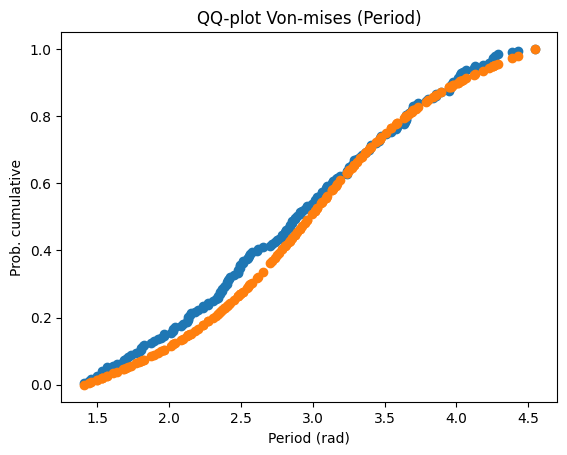

In [272]:
lista_period = [p for p in period.circular_date(9, 'rad')]
cdf = cdf_empi(lista_period)

x = [value[0] for value in cdf]
y = [value[1] for value in cdf]

np.random.seed(21)
y_simu = vonmises.cdf(x, 0.56, 2.9787, 0.4988)


plt.scatter(x, y)

plt.scatter(x, y_simu)


plt.title('QQ-plot Von-mises (Period)')
plt.xlabel('Period (rad)')
plt.ylabel('Prob. cumulative')
plt.show()

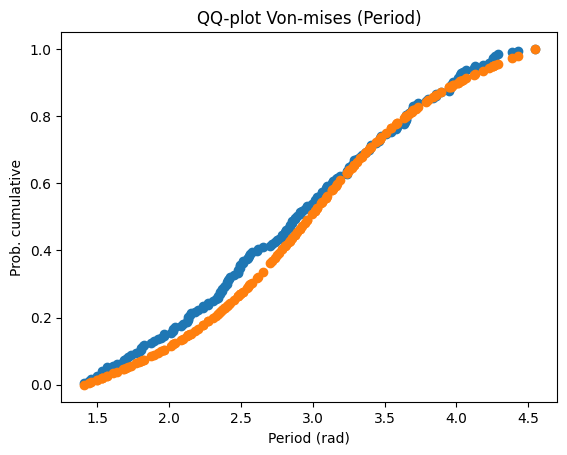

In [202]:
u3_thresh

0.14724273621034006

In [199]:
period.circular_date(9, 'rad')['1998-01-03']

2.134561583808955

In [173]:
U3_period

array([0.20689966, 0.96886613, 0.98436861, 0.43736252, 0.72032868,
       0.45414012, 0.70000608, 0.4108442 , 0.4461627 , 0.87233198,
       0.15716054, 0.26576636, 0.78307854, 0.38516311, 0.00264674,
       0.19283431, 0.30184762, 0.69232998, 0.12307791, 0.73478142,
       0.45620135, 0.45466418, 0.49588233, 0.23714111, 0.03411998,
       0.98618745, 0.57765932, 0.29580565, 0.34288814, 0.77592093,
       0.22000167, 0.06038884, 0.93414838, 0.68398593, 0.33713726,
       0.2966442 , 0.74389011, 0.61661822, 0.27130059, 0.66876581,
       0.93384449, 0.24735768, 0.18595193, 0.33885085, 0.18194316,
       0.85287566, 0.7069975 , 0.06355936, 0.41843839, 0.2375068 ,
       0.49865344, 0.78142129, 0.66795918, 0.19711239, 0.03139421,
       0.84237616, 0.08475197, 0.80223818, 0.19281212, 0.32447082,
       0.70231618, 0.52189112, 0.38799657, 0.46175976, 0.35658834,
       0.67745643, 0.81362543, 0.37669211, 0.45860989, 0.21310346,
       0.69465717, 0.6431802 , 0.87414014, 0.05989836, 0.54332

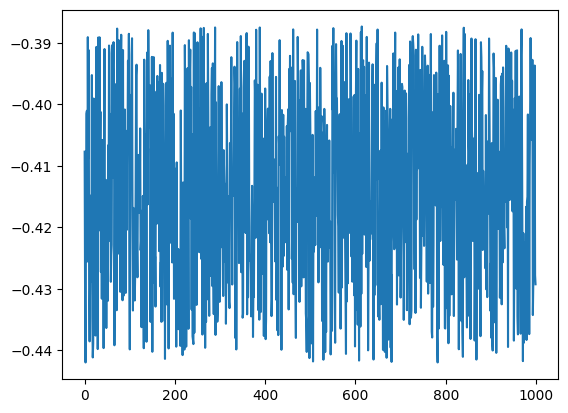

In [155]:
plt.plot(U3_period)

ValueError: unknown method "[34]"

1.0000012451194638

In [139]:
norm.ppf(0.3)

-0.5244005127080409

In [133]:
mvn.cdf([norm.ppf(5471), norm.ppf(34), norm.ppf(34)])

0.0

In [130]:
simulated_data = mvn.rvs(size=1000)

# Transformar os simulados para o espaço uniforme
simulated_u = norm.cdf(simulated_data)



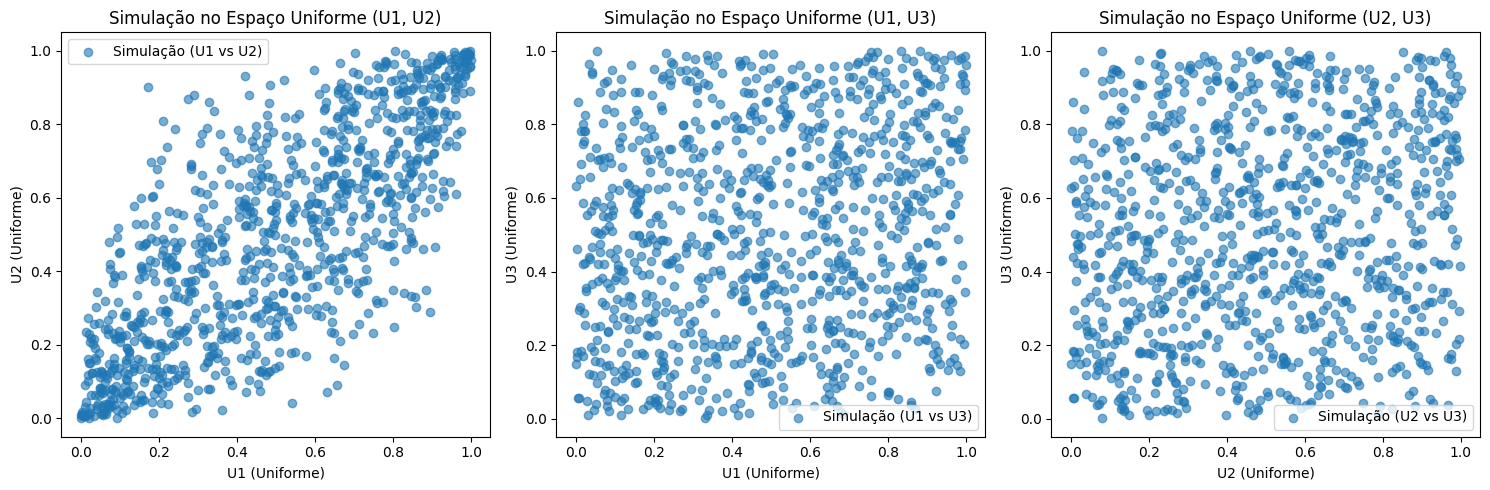

In [132]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(simulated_u[:, 0], simulated_u[:, 1], alpha=0.6, label="Simulação (U1 vs U2)")
plt.xlabel("U1 (Uniforme)")
plt.ylabel("U2 (Uniforme)")
plt.title("Simulação no Espaço Uniforme (U1, U2)")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(simulated_u[:, 0], simulated_u[:, 2], alpha=0.6, label="Simulação (U1 vs U3)")
plt.xlabel("U1 (Uniforme)")
plt.ylabel("U3 (Uniforme)")
plt.title("Simulação no Espaço Uniforme (U1, U3)")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(simulated_u[:, 1], simulated_u[:, 2], alpha=0.6, label="Simulação (U2 vs U3)")
plt.xlabel("U2 (Uniforme)")
plt.ylabel("U3 (Uniforme)")
plt.title("Simulação no Espaço Uniforme (U2, U3)")
plt.legend()

plt.tight_layout()
plt.show()


In [131]:
simulated_u

array([[0.92787233, 0.61697496, 0.34226056],
       [0.01818308, 0.10257441, 0.1706875 ],
       [0.51989885, 0.91943722, 0.92132569],
       ...,
       [0.07953392, 0.07922893, 0.91686019],
       [0.65959325, 0.70980275, 0.71724652],
       [0.11478415, 0.10842227, 0.8871008 ]])

In [87]:
for prob in U3_period:
    if prob > 0:
        print(prob)

In [89]:
U3_period*-1

array([0.40768899, 0.43190181, 0.4419641 , 0.41744733, 0.4015238 ,
       0.40104564, 0.4255479 , 0.4440755 , 0.40880224, 0.44626492,
       0.43218656, 0.43853719, 0.42959852, 0.41484448, 0.41946265,
       0.42881442, 0.39523989, 0.4344766 , 0.44114622, 0.43889286,
       0.39905372, 0.40053873, 0.41536326, 0.42034144, 0.4375843 ,
       0.43652252, 0.44572337, 0.40217253, 0.40433418, 0.43978439,
       0.44413584, 0.42053867, 0.41636728, 0.44409195, 0.41053628,
       0.40120301, 0.42726075, 0.40609612, 0.4315913 , 0.40578453,
       0.41714699, 0.40684834, 0.43962858, 0.40867958, 0.44607665,
       0.427831  , 0.4173462 , 0.41227976, 0.43635974, 0.41984978,
       0.41267788, 0.43197099, 0.40666461, 0.42225245, 0.44548944,
       0.44678557, 0.41471733, 0.40155724, 0.42884877, 0.42449317,
       0.42284522, 0.44542575, 0.41194427, 0.39370701, 0.4449196 ,
       0.39627291, 0.43916861, 0.42360186, 0.39673248, 0.39877189,
       0.43177807, 0.43347029, 0.44262395, 0.42182944, 0.42427

In [65]:
rho

0.6709140562868176

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rankdata

# Modelando cada variável por meio de uma função de probabilidade
np.random.seed(42)  # Para reprodutibilidade
x1 = np.random.exponential(scale=2, size=500)  # Exponencial
x2 = 0.5 * x1 + np.random.normal(loc=0, scale=1, size=500)  # Dependência artificial

# Passo 1: Transformação para uniformes (CDF empírica)
u1 = rankdata(x1) / (len(x1) + 1)  # Normalização pela CDF empírica
u2 = rankdata(x2) / (len(x2) + 1)

# Passo 2: Cálculo da correlação para a cópula Gaussiana
rho = np.corrcoef(norm.ppf(u1), norm.ppf(u2))[0, 1]  # Correlação no espaço normal

# Passo 3: Visualização dos dados originais e transformados
plt.figure(figsize=(10, 5))

# Dados originais
plt.subplot(1, 2, 1)
plt.scatter(x1, x2, alpha=0.6, label="Amostras Originais")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Dados Originais")
plt.legend()

# Espaço uniforme
plt.subplot(1, 2, 2)
plt.scatter(u1, u2, alpha=0.6, label="Transformados (U1, U2)")
plt.xlabel("U1 (Uniforme)")
plt.ylabel("U2 (Uniforme)")
plt.title(f"Dados no Espaço Uniforme (Correlação: {rho:.2f})")
plt.legend()

plt.tight_layout()
plt.show()


#### Teste

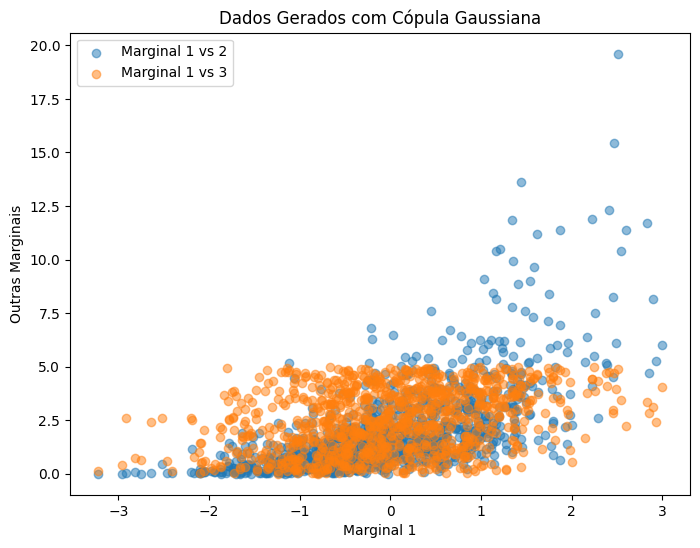

In [51]:
import numpy as np
from scipy.stats import multivariate_normal, norm

# 1. Definir a matriz de correlação
# Certifique-se de que esta matriz seja positiva definida
correlation_matrix = np.array([
    [1.0, 0.7, 0.3],
    [0.7, 1.0, 0.5],
    [0.3, 0.5, 1.0]
])

# 2. Gerar dados da cópula gaussiana
# Número de amostras
n_samples = 1000

# Criar a distribuição normal multivariada padrão
mv_norm = multivariate_normal(mean=np.zeros(3), cov=correlation_matrix)

# Gerar amostras e transformá-las para o espaço uniforme usando a CDF
samples = mv_norm.rvs(size=n_samples)  # Amostras na escala normal
uniform_samples = norm.cdf(samples)   # Transformar para uniforme [0, 1]

# 3. Transformar para o espaço das marginais
# Assumindo marginais conhecidas: Exemplo: Normal, Exponencial e Uniforme
from scipy.stats import expon, uniform

# Transformar amostras uniformes para marginais
marginal_1 = norm.ppf(uniform_samples[:, 0], loc=0, scale=1)   # Normal(0, 1)
marginal_2 = expon.ppf(uniform_samples[:, 1], scale=2)         # Exponencial(2)
marginal_3 = uniform.ppf(uniform_samples[:, 2], loc=0, scale=5)  # Uniforme(0, 5)

# Combinar as marginais em uma matriz final
final_samples = np.column_stack((marginal_1, marginal_2, marginal_3))

# 4. Visualizar os dados
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(final_samples[:, 0], final_samples[:, 1], alpha=0.5, label="Marginal 1 vs 2")
plt.scatter(final_samples[:, 0], final_samples[:, 2], alpha=0.5, label="Marginal 1 vs 3")
plt.xlabel("Marginal 1")
plt.ylabel("Outras Marginais")
plt.legend()
plt.title("Dados Gerados com Cópula Gaussiana")
plt.show()
